Data preprocessing and modeling

- Full Name: Nguyễn Minh Tuấn

---

Check the code environment:

In [1]:
import sys
sys.executable, sys.version

('/home/minhtuan2511/anaconda3/envs/min_ds-env/bin/python',
 '3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27) \n[GCC 9.3.0]')

## Import

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
set_config(display='diagram') # to visualize pipeline

# You can also import other things ...
# YOUR CODE HERE (OPTION)
from sklearn.metrics import accuracy_score

---

## Collect data

The dataset used in this lab is a pre-collected dataset for heart disease prediction. ([Reference](https://archive.ics.uci.edu/ml/datasets/heart+disease)); It is changed a few things fit the goal of the lab.

Data files include:
- File "lab03_train.csv": data set train
- File "lab03_test.csv": data set test
- File "description.txt": describe the meaning of the columns

---

## Data exploratory

In [3]:
data_df = pd.read_csv('lab03_train.csv') 
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,43.0,NaN,2,122,NaN,0,1,NaN,0,0.2,1.0,0,2,1
1,66.0,female,2,146,278.0,0,0,152.0,0,0.0,1.0,1,2,1
2,58.0,male,2,140,211.0,1,0,165.0,0,0.0,2.0,0,2,1
3,63.0,female,0,124,NaN,0,1,NaN,1,0.0,1.0,0,2,0
4,57.0,male,1,154,232.0,0,0,164.0,0,0.0,NaN,1,2,0


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       221 non-null    float64
 1   sex       196 non-null    object 
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      207 non-null    float64
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   70 non-null     float64
 8   exang     242 non-null    int64  
 9   oldpeak   206 non-null    float64
 10  slope     216 non-null    float64
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
 13  target    242 non-null    int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 26.6+ KB


### How many rows and columns does the data have?

In [5]:
data_df.shape

(242, 14)

### What does each sample mean? Does it matter that the samples have different meanings?

The data shows that each sample contains information for a patient, and it doesn't seem to matter that the samples have different meanings.

### Does the data have duplicate sample?

In [6]:
# Number of duplicated lines
data_df.index.duplicated().sum()

0

### What does each column mean? 

Read file "description.txt".

In [7]:
with open('description.txt', 'r') as f:
    print(f.read())

1) age:		age in years
2) sex:		sex (male; female)
3) cp: 		chest pain type
4) trestbps: 	resting blood pressure
5) chol: 	serum cholestoral in mg/dl
6) fbs: 	fasting blood sugar > 120 mg/dl
7) restecg: 	resting electrocardiographic results (values 0,1,2)
8) thalach: 	maximum heart rate achieved
9) exang: 	exercise induced angina
10) oldpeak: 	= ST depression induced by exercise relative to rest
11) slope: 	the slope of the peak exercise ST segment
12) ca: 	number of major vessels (0-3) colored by flourosopy
13) thal: 	displays the thalassemia


---

In the next step, you will split the data set into 2 or 3 subset. These can be train set, validation set, test set. After that, you will continue explore the train set to get its insight.

The reason why not continue exploring is that the validation and testing set are the special set which must be hidden. If you explore the data too much, understand the data too much and then separate the data set, the results on the validation set and the test set may not be objective.


---

## Data Discovery (for how to separate sets)
To know how to split the data set, we need to explore the output column:

- What data type does this column have? In the regression problem, the output column must be in numeric form; if there is no numeric form (for example, numbers but stored as strings) then we need to convert to numeric form and then separate the subsets.
- Does this column have a missing value? If it have missing value, we will remove the rows where the output has a missing value and then split the subsets (the type of learning that learns from data where the output has a missing value is called semi-supervised); 
- If this column is categorical, what is the ratio of the classes? If the ratio of classes are disparate too much, then we may need to go back to the data collection step and collect more so that the ratio of the classes do not differ too much (or using unique techniques to solve the imbalance of the data set).

In [8]:
# What data type does output column have?
data_df['target'].dtype

dtype('int64')

In [9]:
# The number of missing value
data_df['target'].isna().sum()

0

1    54.132231
0    45.867769
Name: target, dtype: float64

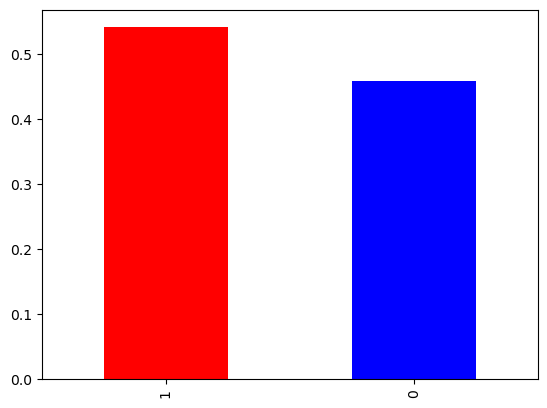

In [10]:
# what is the ratio of the classes?
data_df.target.value_counts(normalize=True).plot(kind="bar", color=["red", "blue"])
data_df['target'].value_counts(normalize=True) * 100

OK, no problem at all. The ratio between classes is also quite balanced, so we should be able to apply common techniques to solve this problem.

---

## Preprocessing (Splitting Data)

In [11]:
# Get predictor(X) and target(y)
y_sr = data_df["target"] 
X_df = data_df.drop("target", axis=1)

In [12]:
# Split the training set and the validation set by the ratio of 80%: 20%
train_X_df, val_X_df, train_y_sr, val_y_sr = \
                              train_test_split(X_df, y_sr, 
                                               test_size=0.2, 
                                               stratify=y_sr, 
                                               random_state=0)

In [13]:
train_X_df.shape

(193, 13)

In [14]:
train_y_sr.shape

(193,)

In [15]:
val_X_df.shape

(49, 13)

In [16]:
val_y_sr.shape

(49,)

In [17]:
train_X_df.head().index

Int64Index([214, 160, 23, 57, 206], dtype='int64')

&#9889; I've fixed `random_state` in `train_test_split` to make sure my results are the same as yours. However, I don't know if this is guaranteed with different operating systems. The result of my `train_X_df.head().index` statement is 5 values: 214, 160, 23, 57, 206. If yours is different, please report back to me on moodle (or zalo), because if it is different, your results will also be different from mine.

---

## Exploring data on training set

After separating the subsets, we can freely explore on the training set without scaring about data leakage problem.

### Check data type of each attribute

In [18]:
train_X_df.dtypes

age         float64
sex          object
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope       float64
ca            int64
thal          int64
dtype: object

### Exploring the distribution of numerical attributes

In [19]:
train_X_df.dtypes[train_X_df.dtypes != object]

age         float64
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope       float64
ca            int64
thal          int64
dtype: object

In [20]:
pd.set_option("display.float", "{:.2f}".format)
train_X_df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,174.00,193.00,193.00,164.00,193.00,193.00,55.00,193.00,164.00,171.00,193.00,193.00
mean,55.18,1.15,131.85,245.91,0.14,0.55,147.04,0.31,1.06,1.45,0.70,2.31
std,9.08,1.64,16.51,50.38,0.35,0.54,23.36,0.46,1.22,0.61,1.00,0.62
min,29.00,0.00,100.00,131.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,120.00,211.75,0.00,0.00,131.50,0.00,0.00,1.00,0.00,2.00
50%,57.00,1.00,130.00,239.00,0.00,1.00,152.00,0.00,0.70,2.00,0.00,2.00
75%,62.00,2.00,140.00,275.25,0.00,1.00,162.50,1.00,1.80,2.00,1.00,3.00
max,76.00,9.00,180.00,417.00,1.00,2.00,182.00,1.00,6.20,2.00,4.00,3.00


---

## Preprocessing (Training set) (3.5đ)

First, we will add and remove some columns as follows:
- With the `cp` column, we will proceed to extract the corresponding `cp_reduced` column. When you explore, you will see that `cp` has quite a few different values in the train set (in the train set have 10 values, but in the test set have more), some of which only appear one or very few times; if we don't deal with it, when converting to numeric by one-hot method, there will be many columns &#8594; prone to overfit. We will handle this problem as follows: take only `num_top_cp_values` (for example, 4) the value that appear most often, the rest will be replaced by the value `-1` (When modeling, We will encode this column as one-hot, so choose any value that is not in `top_cp_values` to replace it, but we will choose the value `-1`). Later, we will experiment to choose the right `num_top_cp_values` value. After processing the `cp_reduced` column, we add this column to the dataframe and remove the `cp` column.
- Removed the `thalach` column because it has too many missing values.

The class `ColAdderDropper` will perform the steps above. Because in the steps above, there is a step where we need to compute the values from the training set (`num_top_cp_values` the value of the column "cp_reduced" that appear most) and use these values to "transform" the dataset. (it can be a training set, it can be a validation set or a test set) so we have to define a class in Sklearn's "transformer" form (so we can use Sklearn's pipeline later) and in it we have to manually define it. define `fit` and `transform` methods (also if you just need to "transform" the data set without calculating any values from the training set, using `FunctionTransformer` as in the file ["08-Demo.ipynb"](https://colab.research.google.com/drive/1kZwBNAikKWplKTCKIn0ofQ9eIX12ePEl#scrollTo=gn0O90j_prDS) will more convenient). Note: the `fit` method is only used on the training set, and the `transform` method (after `fit`) can be used for any set.

Below, I have pre-installed the `fit` method; after `fit`, the values of the `cp` column along with the number of occurrences will be stored in the `self.cp_counts_` attribute (when "transform" this information is not needed, but you may want to see this information), and `num_top_cp_values` the value that occurs most often is saved to `self.top_cp_values_` (`num_top_cp_values` is the hyperparameter that must be specified when creating an object of this class). Your task is to implement the `transform` method (in which `self.top_cp_values_` will be used); Please note that the data in `X_df` is not changed.

Also, as you can see below, the `ColAdderDropper` class is inherited from two Sklearn classes `BaseEstimator` and `TransformerMixin`. This inheritance helps our class automatically have methods like `set_params`, `get_params`, `fit_transform` (otherwise we would have to define these methods ourselves). If you want to learn more about how to write classes in Sklearn format, you can read [here](https://scikit-learn.org/stable/developers/develop.html?highlight=baseestimator).

In [21]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_cp_values=3):
        self.num_top_cp_values = num_top_cp_values
        
    def fit(self, X_df, y=None):
        self.cp_counts_ = X_df['cp'].value_counts()
        cps = list(self.cp_counts_.index)
        self.top_cp_values_ = cps[:max(1, min(self.num_top_cp_values, len(cps)))]
        return self
    
    def transform(self, X_df, y=None):
        
        out_df = X_df.copy()
        # YOUR CODE HERE
        out_df['cp_reduced'] = out_df['cp'].apply(lambda x: -1 if x not in self.top_cp_values_ else x)
        out_df = out_df.drop(columns= ['cp', 'thalach'])

        out_df = out_df.sort_index(axis=1)
        return out_df

In [22]:
# TEST FIT METHOD
col_adderdropper = ColAdderDropper(num_top_cp_values=3)
col_adderdropper.fit(data_df)
print(col_adderdropper.cp_counts_)
print()
print(col_adderdropper.top_cp_values_)

0    117
2     69
1     36
3      5
6      4
4      3
9      3
5      2
7      2
8      1
Name: cp, dtype: int64

[0, 2, 1]


In [23]:
# TEST TRANSFORM METHOD
fewer_cols_train_X_df = col_adderdropper.transform(train_X_df)
assert set(fewer_cols_train_X_df.columns) == \
                                {'age', 'ca', 'chol', 'cp_reduced', 'exang', 'fbs', 'oldpeak', 'restecg', 'sex', 'slope', 'thal', 'trestbps'}
                                
assert np.all(fewer_cols_train_X_df['cp_reduced'].value_counts() == \
              pd.Series([94, 55, 29, 15], 
                        [0, 2, 1, -1]))
fewer_cols_train_X_df.head()

,age,ca,chol,cp_reduced,exang,fbs,oldpeak,restecg,sex,slope,thal,trestbps
214,64.00,0,335.00,2,0,0,0.00,1,NaN,2.00,2,140
160,49.00,0,271.00,1,0,0,0.00,1,female,NaN,2,134
23,59.00,1,239.00,0,1,0,NaN,0,male,1.00,3,110
57,60.00,0,NaN,2,0,1,0.00,1,female,2.00,2,120
206,65.00,0,177.00,0,0,0,0.40,1,male,2.00,3,120


Next, you will have to make a list of numeric columns (numerical) and non-numeric columns (categorical). The next preprocessing steps are as follows:
- For numeric columns, we will fill in the missing value with the mean value of the column <font color=gray> (hint: use `SimpleImputer` in Sklearn)</font>. For *all* numeric columns in the training set, we all need to compute the mean, because we don't know which columns will be missing values when predicting with the new input vectors.
- For non-numeric and unordered columns:
     - We will fill in the missing value with the mode value (the most occurring value) of the column <font color=gray> (hint: use `SimpleImputer` in Sklearn)</font>. With *all* non-numerical and unordered columns, we all need to compute the mode, because we don't know which columns will be missing values when predicting with the new input vectors.
     - Then we will convert to numeric by one-hot encoding method <font color=gray> (hint: use `OneHotEncoder` in Sklearn, watch out for `handle_unknown` parameter because when predicting with vectors- new input string ...)</font>.

- Finally, when all columns have been filled with missing values and are in numeric form, we will proceed to normalize the range by subtracting the mean and dividing by the column's std to help the optimization algorithm as Gradient Descent, LBFGS, ... converge faster than <font color=gray>(hint: use `StandardScaler` in Sklearn)</font>.

Your task is to create a pipeline, name it `preprocess_pipeline`, including: the step of adding `cp_reduced` columns and removing columns (installed in class `ColAdderDropper`, you set `num_top_cp_values=3`), and all the steps here (please note to follow the order of the steps and columns that I have described). Once you've created this pipeline, you'll call the `fit_transform` method with `train_X_df` as input to compute the values from the training set (for example, `top_cp_values_` in adding and removing columns; mean and mode in the missing value processing step; mean and std in the normalization step) and also `train_X_df` preprocessing; The result will be `train_X_df` after preprocessing, which is a Numpy array, you name it `preprocessed_train_X`. <font color=gray>(Hint: you read how to use pipeline in [document](https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression), maybe skip 6.1.2; you'll need to use `Pipeline`/`make_pipeline` and `ColumnTransformer`/`make_column_transformer`.)</font>

In [24]:
# You determine which column is numerical or categorical
# (Hint: consider columns with different number of values < 15 )
# YOUR CODE HERE
temp_df = train_X_df.nunique() < 15
categorical_cols = train_X_df.columns[temp_df].sort_values().to_list()
categorical_cols[1] = 'cp_reduced'
numerics_cols = train_X_df.columns[~temp_df].sort_values().to_list()
numerics_cols.remove('thalach')


#preprocess_pipeline
nume_transformer = Pipeline([('mean_imputer', SimpleImputer(strategy='mean'))])
cate_transformer = Pipeline([('mode_imputer', SimpleImputer(strategy='most_frequent')),
                             ('encoder', OneHotEncoder(handle_unknown='ignore'))])
nan_filler = ColumnTransformer([('nume_fillna', nume_transformer, numerics_cols),
                                ('cate_fillna', cate_transformer, categorical_cols)])

preprocess_pipeline = Pipeline([
    ('adder_dropper', ColAdderDropper(num_top_cp_values=3)),
    ('nan_filler', nan_filler), 
    ('scaler', StandardScaler())
])

preprocessed_train_X = preprocess_pipeline.fit_transform(train_X_df)

In [25]:
numerics_cols

['age', 'chol', 'oldpeak', 'trestbps']

In [26]:
# TEST
assert preprocessed_train_X.shape == (193, 29)
row0 = [1.026, 1.924, -0.953, 0.495, 0.832, -0.503, -0.386, -0.269, -0.102, -0.29, -0.974, -0.421, 1.584, 0.672, -0.672,
        0.403, -0.403, -0.935, 0.974, -0.145, -0.647, 0.647, -0.234, -0.789, 0.878, -0.072, -0.269, 0.915, -0.789]
assert list(preprocessed_train_X[0].round(3)) == row0
preprocess_pipeline

Pipeline(steps=[('adder_dropper', ColAdderDropper()),
                ('nan_filler',
                 ColumnTransformer(transformers=[('nume_fillna',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'chol', 'oldpeak',
                                                   'trestbps']),
                                                 ('cate_fillna',
                                                  Pipeline(steps=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ca', 'cp_reduced', 'exang',
                                                   'fbs', 'restecg', 'sex',
                                                   'slope', 'thal'])])),
                ('scaler', StandardScaler())])

## Preprocessing (validation set) (1.5đ)


Once we have `preprocess_pipeline` with statistics calculated from the training set, we can easily use the `transform` method to preprocess the new input vectors in the validation and test sets. . Below, you will do the same to preprocess `val_X_df` and save the result in `preprocessed_val_X` (only need 1 line of code)

In [27]:
# YOUR CODE HERE
preprocessed_val_X = preprocess_pipeline.transform(val_X_df)

In [28]:
# Test
assert preprocessed_val_X.shape == (49, 29)
row0 = [-1.534, -0.797, -0.953, -0.72, 0.832, -0.503, -0.386, -0.269, -0.102, -0.29, -0.974, -0.421, 1.584, 0.672, -0.672,
        0.403, -0.403, -0.935, 0.974, -0.145, 1.545, -1.545, -0.234, 1.268, -1.139, -0.072, -0.269, 0.915, -0.789]
assert list(preprocessed_val_X[0].round(3)) == row0


---

## Preprocessing and Modeling Data

### Find the best model (4đ)

We will use the MLP model for classification. You will create an end-to-end pipeline consisting of: the above preprocessing steps + MLP (with the hyperparameters `hidden_layer_sizes=(50), activation='relu', solver='lbfgs', random_state=0 , max_iter=10000`). You name this pipeline `full_pipeline`. Creating an end-to-end pipeline like this has the following benefits:
- Helps simplify:
     - For end-to-end training, simply call the `fit` method of this pipeline on the raw training set. Now the "transformers" in the preprocessing steps will call `fit_transform`, and the "classifiers" at the end will call `fit`.
     - With input vectors in raw form, to predict just call the pipeline's `predict` method. At this point, the "transformers" in the preprocessing steps will call `transform`, and the "classifiers" at the end will call `predict`.
- Helps avoid preprocessing the validation/test-set in the wrong way (as mentioned in the "Preprocessing (validation set)" section above). 
- Makes it easy to simultaneously test the values of hyperparameters at each step in the pipeline (will do below).

Once you've got this end-to-end pipeline, you'll experiment:
- Hyperparameter `alpha` (L2 regularization coefficient) of `MLPClassifier` with 5 different values: from 0 to 100.
- Hyperparameter `num_top_cp_values` of `ColAdderDropper` (at preprocessing step) with 5 different values: 1, 3, 5, 7, 9.

To reassign `alpha` and `num_top_cp_values` to `full_pipeline`, you would use the `set_params` method:

`full_pipeline.set_params(mlpclassifier__alpha=...)`

If you create a pipeline with `make_pipeline` then the names of the steps will be automatically taken as the names of the classes and lowercase like the two names above. If you use `Pipeline` and name the steps yourself, use your name in the `set_params` method.

Thus, for each model you will: train on the training set, calculate the metric here as the accuracy on the training set and the validation set, and then `append` the measure into two corresponding lists:`train_accs` and `val_accs` (for clarity, you calculate the accuracy in %, meaning it has a value from 0-100, not 0-1). You save the highest accuracy on the validation set and the `alpha` and `num_top_cp_values` values respectively into the `best_val_acc`, `best_alpha`, `best_num_top_cp_values` variables.

In [29]:
# Creating full_pipeline
# YOUR CODE HERE


# Experiment with different values of hyperparameters (the whole process can take 2-3 minutes) and choose the best values
train_accs = []
val_accs = []
alphas = [0,0.01,0.1, 1, 10, 100]
num_top_cp_values_s = [1, 3, 5, 7,9]
best_val_acc = 0
best_alpha = None
best_num_top_cp_values = None
for alpha in alphas:
    for num_top_cp_values in num_top_cp_values_s:
        # YOUR CODE HERE
        preprocess_pipeline.set_params(adder_dropper__num_top_cp_values = num_top_cp_values)
        full_pipeline = Pipeline([
            ('preprocess', preprocess_pipeline),
            ('MLPClassifier', MLPClassifier(hidden_layer_sizes=(50), activation='relu', solver='lbfgs', random_state=0, max_iter=10000, alpha=alpha))
        ])
        
        full_pipeline.fit(train_X_df, train_y_sr)
        
        # predict train_set
        train_y_pred = full_pipeline.predict(train_X_df)
        train_accs.append(accuracy_score(train_y_sr, train_y_pred) * 100)
        
        # predict validation_set
        val_y_pred = full_pipeline.predict(val_X_df)
        val_acc = accuracy_score(val_y_sr, val_y_pred) * 100
        if best_val_acc < val_acc:
            best_val_acc = val_acc
            best_alpha = alpha
            best_num_top_cp_values = num_top_cp_values
        val_accs.append(val_acc)
        


In [30]:
# TEST
full_pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('adder_dropper',
                                  ColAdderDropper(num_top_cp_values=9)),
                                 ('nan_filler',
                                  ColumnTransformer(transformers=[('nume_fillna',
                                                                   Pipeline(steps=[('mean_imputer',
                                                                                    SimpleImputer())]),
                                                                   ['age',
                                                                    'chol',
                                                                    'oldpeak',
                                                                    'trestbps']),
                                                                  ('cate_fillna',
                                                                   Pipeline(steps=[('mode_imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoder',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['ca',
                                                                    'cp_reduced',
                                                                    'exang',
                                                                    'fbs',
                                                                    'restecg',
                                                                    'sex',
                                                                    'slope',
                                                                    'thal'])])),
                                 ('scaler', StandardScaler())])),
                ('MLPClassifier',
                 MLPClassifier(alpha=100, hidden_layer_sizes=50, max_iter=10000,
                               random_state=0, solver='lbfgs'))])

In [31]:
# TEST
assert round(best_val_acc, 2) == 85.71
assert best_alpha == 1
assert best_num_top_cp_values == 3

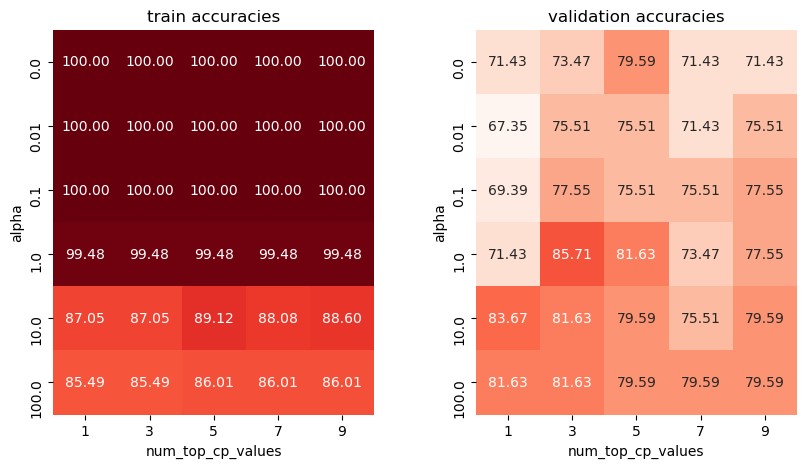

In [32]:
# Visualizing the result
train_accs_df = pd.DataFrame(data=np.array(train_accs).reshape(len(alphas), -1),
                             index=alphas, columns=num_top_cp_values_s)
val_accs_df = pd.DataFrame(
    data=np.array(val_accs).reshape(len(alphas), -1), 
    index=alphas, columns=num_top_cp_values_s)
min_err = min(min(train_accs), min(val_accs))
max_err = max(max(train_accs), max(val_accs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_accs_df, vmin=min_err, vmax=max_err, square=True, 
            annot=True, cbar=False, fmt='.2f', cmap='Reds')
plt.title('train accuracies'); plt.xlabel('num_top_cp_values'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_accs_df, vmin=min_err, vmax=max_err, square=True, 
            annot=True, cbar=False, fmt='.2f', cmap='Reds')
plt.title('validation accuracies'); plt.xlabel('num_top_cp_values'); plt.ylabel('alpha');

About the results:
train accuracies: like i expect
validation accuracies: increase or decrease as num_top_cp_values increases. This may be because the distribution of values in the cp_reduced column of the validation set is much different from that of the train set.

Finally, you will retrain `full_pipeline` on `X_df` and `y_sr` (training set + validation set) with `best_alpha` and `best_num_top_cp_values` found above to get the final model.

In [33]:
# YOUR CODE HERE
full_pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('MLPClassifier', MLPClassifier(hidden_layer_sizes=(50), activation='relu', solver='lbfgs', random_state=0, max_iter=10000))
])
full_pipeline.set_params(preprocess__adder_dropper__num_top_cp_values = best_num_top_cp_values, 
                         MLPClassifier__alpha=best_alpha)

full_pipeline.fit(X_df, y_sr)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('adder_dropper', ColAdderDropper()),
                                 ('nan_filler',
                                  ColumnTransformer(transformers=[('nume_fillna',
                                                                   Pipeline(steps=[('mean_imputer',
                                                                                    SimpleImputer())]),
                                                                   ['age',
                                                                    'chol',
                                                                    'oldpeak',
                                                                    'trestbps']),
                                                                  ('cate_fillna',
                                                                   Pipeline(steps=[('mode_imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoder',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['ca',
                                                                    'cp_reduced',
                                                                    'exang',
                                                                    'fbs',
                                                                    'restecg',
                                                                    'sex',
                                                                    'slope',
                                                                    'thal'])])),
                                 ('scaler', StandardScaler())])),
                ('MLPClassifier',
                 MLPClassifier(alpha=1, hidden_layer_sizes=50, max_iter=10000,
                               random_state=0, solver='lbfgs'))])

### Evaluate your model(1đ)

You will use the final model above to make predictions with the inputs in the test set (file "lab03_test.csv"). In order for me to be able to score (compare with the hidden groundtruth) you have to create a csv file with a single `target` column which is your predicted value (1 - has disease, and 0 - no). You name your file `my_preds.csv`.

In [34]:
test_X_df = pd.read_csv("lab03_test.csv")

In [35]:
test_X_df.to_csv("lab03_test.csv",index=False)

In [36]:
# YOUR CODE HERE
test_y_preds = full_pipeline.predict(test_X_df)
pd.DataFrame(test_y_preds, columns=['target']).to_csv('my_preds.csv', index=False)

In [37]:
# TEST
my_preds_df = pd.read_csv('my_preds.csv')
assert round(my_preds_df['target'].mean(), 3) == 0.574
assert np.all(my_preds_df.iloc[:5].values.reshape(-1) == \
                                     np.array([0, 0, 1, 0, 0]))